# Introduction

## Source of data
Chicago crime rate data link:https://www.kaggle.com/chicago/chicago-crime. 

Data couldn't be downloaded because it is a big query data, so I downloaded the data from the city of chicago website. 

Data exported from: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chosen Dependant variable(Y):
    Crime rate 

Chosen independant variable(X):
    Time
    Location 
    Types of Crime committed
    
 Question that I wish to find out: Are time, location , and types of crime committe direct causes of the increase in the crime rate? 
    
    
Although personally, I have never been to Chicago before, but I have always heard stories about how it is one of the most dangerous cities in the US. I wish to use this opportunity to do some research and exploration on the city of the Chicago. I have chosen Crime rate as the dependant variable because the goal of my project its relation with location, time and types of Crime committed. For independant variables X, I have chosen time , ocation and types of crime comitted. I wish to find out at what time of the day and at which month of the year are the period when crime rate spikes.

Besides exploring the information provided by the data set, I also want to relate my findings from the data set to real life economic reasons. I would like to learn is the most commonly committed crime cause by the environment. For example, If I find the most commonly committed crime to be theif, I will think about whether poverty is one reason that contributes to stealings. To explore whether independant variable has changed over time, I will plot it as a percentage of total crime committed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning
Many of my results will depend on the time occurance of the crime. So I want ot set time as my data index

In [170]:
#read data frame, and then sort the data in chronological order
#reset index to cle
df = pd.read_csv(r"C:\Users\fcars\Desktop\eco225\Project\data\Crimes_-_2001_to_Present.csv")

df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')
df = df.set_index(df.Date)
df['time_in_hour'] = df['Date'].dt.hour
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['time_in_hour'] = df['time_in_hour'].astype(str)
df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_in_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",13,9,2015
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",11,9,2015
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,0,9,2018
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",12,9,2015
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",13,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-15 15:25:00,12606440,JF129763,2022-01-15 15:25:00,016XX S MICHIGAN AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,NaN,NaN,2022,02/01/2022 03:54:31 PM,NaN,NaN,NaN,15,1,2022
2022-01-12 00:01:00,12606071,JF129698,2022-01-12 00:01:00,065XX S YALE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,NaN,NaN,2022,02/01/2022 03:54:31 PM,NaN,NaN,NaN,0,1,2022
2022-01-25 12:00:00,12602400,JF124266,2022-01-25 12:00:00,055XX N PARKSIDE AVE,0810,THEFT,OVER $500,STREET,False,False,...,1137530.0,1936445.0,2022,02/01/2022 03:54:31 PM,41.981753,-87.769578,"(41.981752653, -87.769577707)",12,1,2022


In [3]:
df['Primary Type'].value_counts()

THEFT              1574222
BATTERY            1372063
CRIMINAL DAMAGE     852956
NARCOTICS           740335
ASSAULT             481290
Name: Primary Type, dtype: int64

# Summary statistics for X and Why

## Summary Statistic for x
chosen X variables: 
1. Primary Type
2. Location Description 
3. time_in_hour

In [14]:
df['Primary Type'].describe()

THEFT                                1574222
BATTERY                              1372063
CRIMINAL DAMAGE                       852956
NARCOTICS                             740335
ASSAULT                               481290
OTHER OFFENSE                         464996
BURGLARY                              415087
MOTOR VEHICLE THEFT                   345969
DECEPTIVE PRACTICE                    322909
ROBBERY                               281284
CRIMINAL TRESPASS                     208833
WEAPONS VIOLATION                      95530
PROSTITUTION                           69483
OFFENSE INVOLVING CHILDREN             52851
PUBLIC PEACE VIOLATION                 51392
SEX OFFENSE                            28989
CRIM SEXUAL ASSAULT                    27791
INTERFERENCE WITH PUBLIC OFFICER       17825
LIQUOR LAW VIOLATION                   14646
GAMBLING                               14607
ARSON                                  12711
HOMICIDE                               11701
KIDNAPPING

In [10]:
df['Primary Type'].value_counts()

count     7470958
unique        214
top        STREET
freq      1940201
Name: Location Description, dtype: object

In [17]:
df['Location Description'].value_counts()

STREET                1940201
RESIDENCE             1266718
APARTMENT              821288
SIDEWALK               713879
OTHER                  270060
                       ...   
BANQUET HALL                1
LOADING DOCK                1
CTA SUBWAY STATION          1
FUNERAL PARLOR              1
TRUCKING TERMINAL           1
Name: Location Description, Length: 214, dtype: int64

In [18]:
df['Location Description'].describe()

count     7470958
unique        214
top        STREET
freq      1940201
Name: Location Description, dtype: object

In [22]:
df['time_in_hour'].value_counts()

12    428942
19    423041
20    421896
0     417938
18    409859
21    409831
22    403694
15    398135
17    383730
14    378377
16    377384
13    356024
23    334966
11    331750
9     323264
10    316809
8     252993
1     237223
2     199604
7     170172
3     161222
4     122137
6     119147
5     101745
Name: time_in_hour, dtype: int64

# Crime rate (Y) from 2001- Present
number of crimes in 2022 is not full year data but will be kept in the data frame for references

In [24]:
df.resample('Y').size()

Date
2001-12-31    485820
2002-12-31    486780
2003-12-31    475969
2004-12-31    469411
2005-12-31    453756
2006-12-31    448156
2007-12-31    437069
2008-12-31    427139
2009-12-31    392803
2010-12-31    370454
2011-12-31    351933
2012-12-31    336217
2013-12-31    307399
2014-12-31    275672
2015-12-31    264618
2016-12-31    269661
2017-12-31    268897
2018-12-31    268532
2019-12-31    260917
2020-12-31    211539
2021-12-31    205468
2022-12-31     11673
Freq: A-DEC, dtype: int64

# Visualization




Text(0, 0.5, 'Frequency')

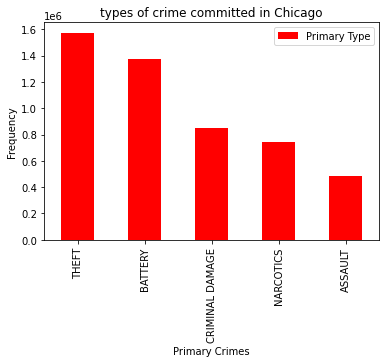

In [27]:
import matplotlib.pyplot as plt
types_of_crimes = df['Primary Type'].value_counts().head().to_frame()
types_of_crimes.plot(kind = 'bar', color = 'r')
plt.title('types of crime committed in Chicago')
plt.xlabel("Primary Crimes")
plt.ylabel('Frequency')



Text(0, 0.5, 'occurances')

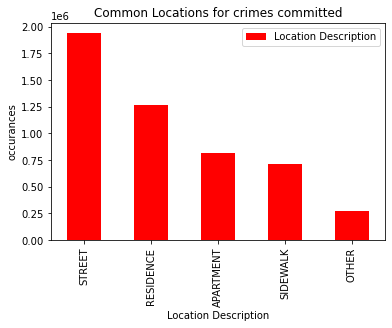

In [26]:
types_of_crimes = df['Location Description'].value_counts().head().to_frame()
types_of_crimes.plot(kind = 'bar', color = 'r')
plt.title('Common Locations for crimes committed')
plt.xlabel("Location Description")
plt.ylabel('occurances')

Text(0, 0.5, 'number of crimes')

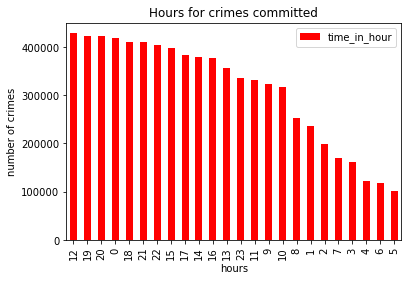

In [42]:
hours = df['time_in_hour'].value_counts().to_frame()
hours.columns = ['Crimes in hours']
#colors = ['grey' if (x < max(hours['Crimes in hours'])) else 'r' for x in hours['Crimes in hours']]
bar = types_of_crimes.plot(kind = 'bar', color = colors)
plt.title('Hours for crimes committed')
plt.xlabel("hours")
plt.ylabel('number of crimes')


## Plotting the macro trend of total crime committed from 2001 to present 


Text(0, 0.5, 'number of crimes')

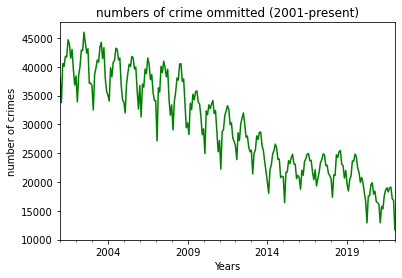

In [95]:
df.resample('M').size().plot(color = 'green',legend = False)
plt.title('numbers of crime ommitted (2001-present)')
plt.xlabel("Years")
plt.ylabel("number of crimes")

In [ ]:
primary_type_count = df[['Primary Type'],['M'],['Y']]
primary_type_count

In [ ]:
primary_type_count = df.pivot_table(df,aggfunc = np.size, columns = 'Primary Type',
                                   index = df.Date, )
primary_type_count

# Plotting Crime Types' relation with total crime

In this section, I will be examining the top 5 most common crimes types. I will be plotting the crimes types occuured each monthas a percentage of total crime committed per month

TOP 5 most common places that crime occur:
1. THEFT
2. BATTERY
3. DAMAGE
4. ARCOTICS
5. AASSULT


In [120]:
crime_per_month = df.resample('M').size()
crime_per_month

Date
2001-01-31    38109
2001-02-28    33782
2001-03-31    40561
2001-04-30    40085
2001-05-31    41832
              ...  
2021-09-30    19019
2021-10-31    19100
2021-11-30    17097
2021-12-31    16816
2022-01-31    11673
Freq: M, Length: 253, dtype: int64

Text(0, 0.5, 'percentage')

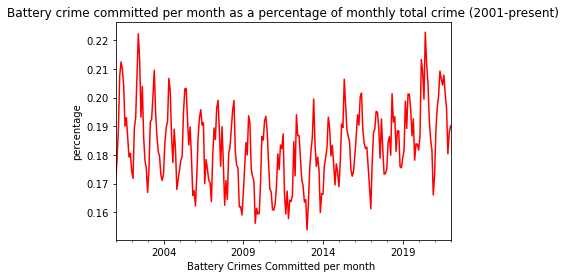

In [145]:
gbPT = df.groupby('Primary Type')
BATTERY = gbPT.get_group('BATTERY').resample('M').size().to_frame()
BATTERY.columns=['BATTERY CRIMES']
BATTERY['crime per month']=crime_per_month
BATTERY['Battery pct of total'] = BATTERY['BATTERY CRIMES']/BATTERY['crime per month']
BATTERY['Battery pct of total'].plot(color = 'r')
plt.title('Battery crime committed per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("Battery Crimes Committed per month ")
plt.ylabel("percentage")



Text(0, 0.5, 'percentage')

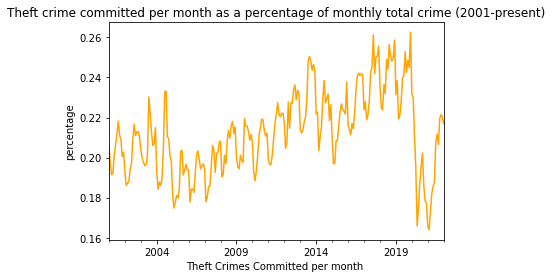

In [131]:
gbPT = df.groupby('Primary Type')
THEFT = gbPT.get_group('THEFT').resample('M').size().to_frame()
THEFT.columns=['THEFT CRIMES']
THEFT['crime per month']=crime_per_month
THEFT['theft pct of total'] = THEFT['THEFT CRIMES']/THEFT['crime per month']
THEFT['theft pct of total'].plot(color = 'orange')
plt.title('Theft crime committed per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("Theft Crimes Committed per month ")
plt.ylabel("percentage")



Text(0, 0.5, 'percentage')

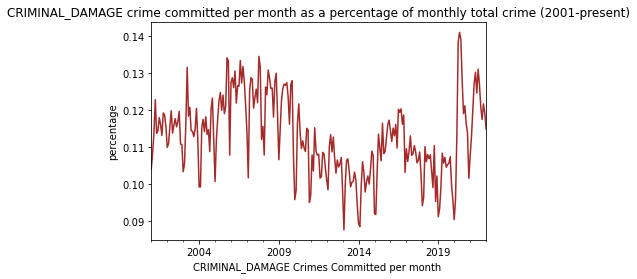

In [135]:
gbPT = df.groupby('Primary Type')
CRIMINAL_DAMAGE = gbPT.get_group('CRIMINAL DAMAGE').resample('M').size().to_frame()
CRIMINAL_DAMAGE.columns=['CRIMINAL_DAMAGE CRIMES']
CRIMINAL_DAMAGE['crime per month']=crime_per_month
CRIMINAL_DAMAGE['CRIMINAL_DAMAGE pct of total'] = CRIMINAL_DAMAGE['CRIMINAL_DAMAGE CRIMES']/CRIMINAL_DAMAGE['crime per month']
CRIMINAL_DAMAGE['CRIMINAL_DAMAGE pct of total'].plot(color = 'brown')
plt.title('CRIMINAL_DAMAGE crime committed per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("CRIMINAL_DAMAGE Crimes Committed per month ")
plt.ylabel("percentage")


Text(0, 0.5, 'percentage')

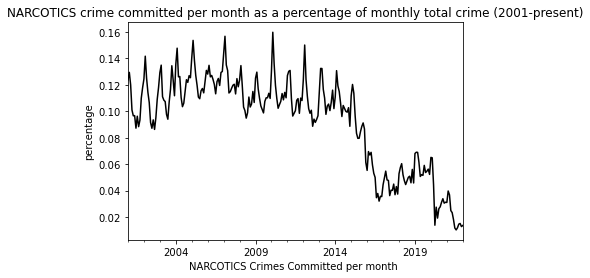

In [138]:
gbPT = df.groupby('Primary Type')
NARCOTICS = gbPT.get_group('NARCOTICS').resample('M').size().to_frame()
NARCOTICS.columns=['NARCOTICS CRIMES']
NARCOTICS['crime per month']=crime_per_month
NARCOTICS['NARCOTICS pct of total'] = NARCOTICS['NARCOTICS CRIMES']/NARCOTICS['crime per month']
NARCOTICS['NARCOTICS pct of total'].plot(color = 'black')
plt.title('NARCOTICS crime committed per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("NARCOTICS Crimes Committed per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

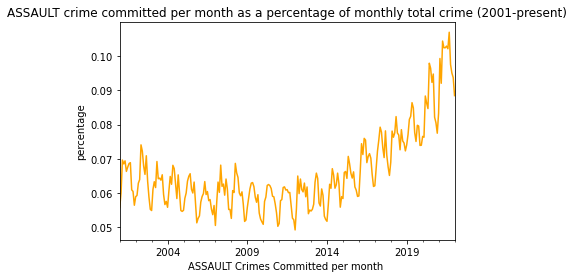

In [153]:
gbPT = df.groupby('Primary Type')
ASSAULT = gbPT.get_group('ASSAULT').resample('M').size().to_frame()
ASSAULT.columns=['ASSAULT CRIMES']
ASSAULT['crime per month']=crime_per_month
ASSAULT['ASSAULT pct of total'] = ASSAULT['ASSAULT CRIMES']/ASSAULT['crime per month']
ASSAULT['ASSAULT pct of total'].plot(color = 'orange')
plt.title('ASSAULT crime committed per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("ASSAULT Crimes Committed per month ")
plt.ylabel("percentage")

# Plotting Location's relation with total crime

In this section, I will be examining the top 5 most common places that a crime occurs. I will be plotting the crimes occured in each location each monthas a percentage of total crime committed per month

TOP 5 most common places that crime occur:
1. STREET
2. RESIDENCE
3. APARTMENT
4. SIDEWALK
5. OTHER


Text(0, 0.5, 'percentage')

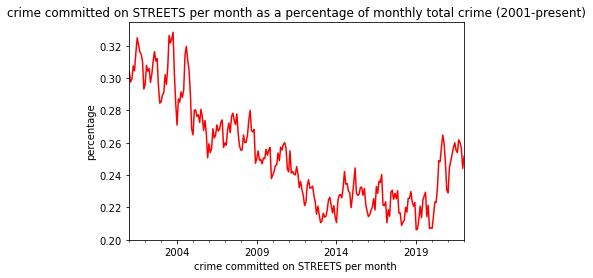

In [154]:
gbLD = df.groupby('Location Description')
STREET = gbLD.get_group('STREET').resample('M').size().to_frame()
STREET.columns=['crime committed on STREETS']
STREET['crime per month']=crime_per_month
STREET['STREET crime pct of total'] = STREET['crime committed on STREETS']/STREET['crime per month']
STREET['STREET crime pct of total'].plot(color = 'r')
plt.title('crime committed on STREETS per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed on STREETS per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

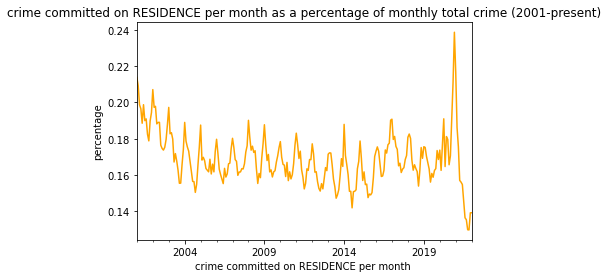

In [156]:
gbLD = df.groupby('Location Description')
RESIDENCE = gbLD.get_group('RESIDENCE').resample('M').size().to_frame()
RESIDENCE.columns=['crime committed on RESIDENCE']
RESIDENCE['crime per month']=crime_per_month
RESIDENCE['RESIDENCE crime pct of total'] = RESIDENCE['crime committed on RESIDENCE']/RESIDENCE['crime per month']
RESIDENCE['RESIDENCE crime pct of total'].plot(color = 'orange')
plt.title('crime committed on RESIDENCE per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed on RESIDENCE per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

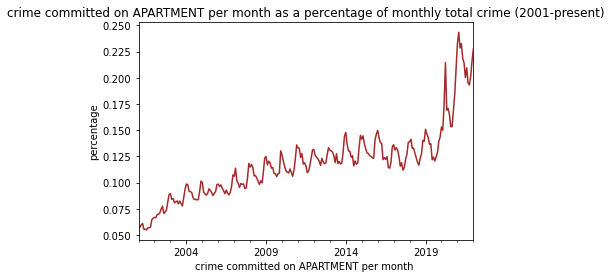

In [158]:
gbLD = df.groupby('Location Description')
APARTMENT = gbLD.get_group('APARTMENT').resample('M').size().to_frame()
APARTMENT.columns=['crime committed on APARTMENT']
APARTMENT['crime per month']=crime_per_month
APARTMENT['APARTMENT pct of total'] = APARTMENT['crime committed on APARTMENT']/APARTMENT['crime per month']
APARTMENT['APARTMENT pct of total'].plot(color = 'brown')
plt.title('crime committed on APARTMENT per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed on APARTMENT per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

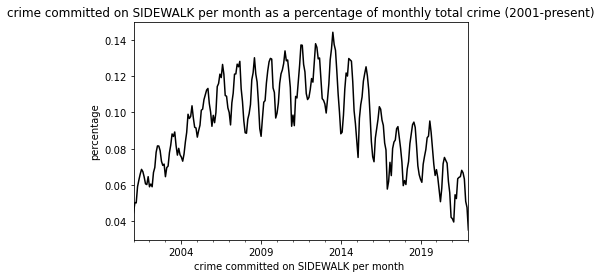

In [159]:
gbLD = df.groupby('Location Description')
SIDEWALK = gbLD.get_group('SIDEWALK').resample('M').size().to_frame()
SIDEWALK.columns=['crime committed on SIDEWALK']
SIDEWALK['crime per month']=crime_per_month
SIDEWALK['SIDEWALK pct of total'] = SIDEWALK['crime committed on SIDEWALK']/SIDEWALK['crime per month']
SIDEWALK['SIDEWALK pct of total'].plot(color = 'black')
plt.title('crime committed on SIDEWALK per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed on SIDEWALK per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

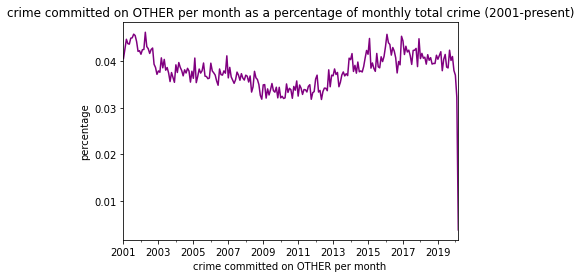

In [160]:
gbLD = df.groupby('Location Description')
OTHER = gbLD.get_group('OTHER').resample('M').size().to_frame()
OTHER.columns=['crime committed on OTHER']
OTHER['crime per month']=crime_per_month
OTHER['OTHER pct of total'] = OTHER['crime committed on OTHER']/OTHER['crime per month']
OTHER['OTHER pct of total'].plot(color = 'purple')
plt.title('crime committed on OTHER per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed on OTHER per month ")
plt.ylabel("percentage")

# Plotting daily hours' relation with total crime

In this section, I will be examining the amount of crimes happened in each hour. I will be plotting the crimes occured in each hour each month as a percentage of total crime committed per month

TOP 5 most common period that crime occur:
1. 12PM
2. 19PM
3. 20PM
4. 0AM
5. 18PM


Text(0, 0.5, 'percentage')

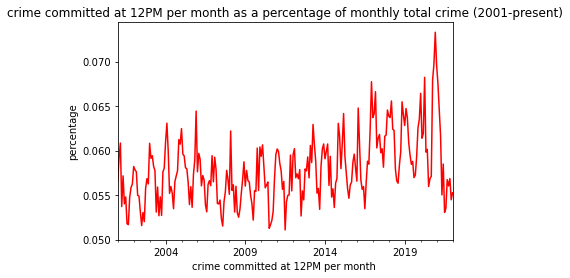

In [174]:
gbTH = df.groupby('time_in_hour')
twelve_pm = gbTH.get_group('12').resample('M').size().to_frame()
twelve_pm.columns=['crime committed at 12PM']
twelve_pm['crime per month']=crime_per_month
twelve_pm['12PM crime pct of total'] = twelve_pm['crime committed at 12PM']/twelve_pm['crime per month']
twelve_pm['12PM crime pct of total'].plot(color = 'r')
plt.title('crime committed at 12PM per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed at 12PM per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

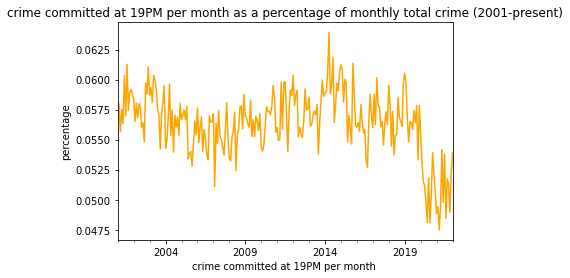

In [177]:
gbTH = df.groupby('time_in_hour')
nineteen_pm = gbTH.get_group('19').resample('M').size().to_frame()
nineteen_pm.columns=['crime committed at 19PM']
nineteen_pm['crime per month']=crime_per_month
nineteen_pm['19PM crime pct of total'] = nineteen_pm['crime committed at 19PM']/nineteen_pm['crime per month']
nineteen_pm['19PM crime pct of total'].plot(color = 'orange')
plt.title('crime committed at 19PM per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed at 19PM per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

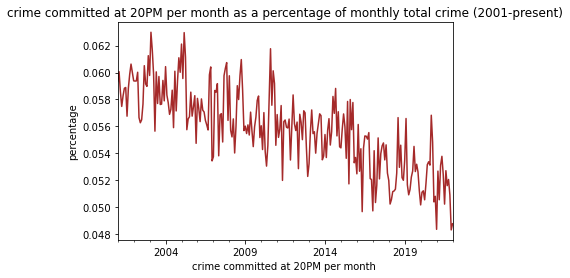

In [179]:
gbTH = df.groupby('time_in_hour')
twenty_pm = gbTH.get_group('20').resample('M').size().to_frame()
twenty_pm.columns=['crime committed at 20PM']
twenty_pm['crime per month']=crime_per_month
twenty_pm['20PM crime pct of total'] = twenty_pm['crime committed at 20PM']/twenty_pm['crime per month']
twenty_pm['20PM crime pct of total'].plot(color = 'brown')
plt.title('crime committed at 20PM per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed at 20PM per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

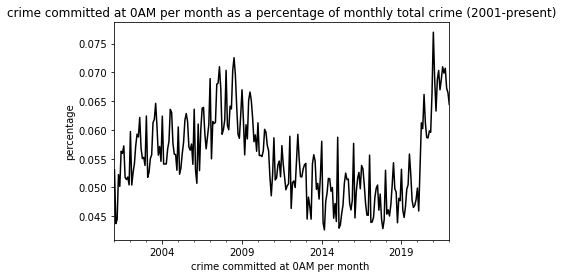

In [181]:
gbTH = df.groupby('time_in_hour')
zero_am = gbTH.get_group('0').resample('M').size().to_frame()
zero_am.columns=['crime committed at 0AM']
zero_am['crime per month']=crime_per_month
zero_am['0AM crime pct of total'] = zero_am['crime committed at 0AM']/zero_am['crime per month']
zero_am['0AM crime pct of total'].plot(color = 'black')
plt.title('crime committed at 0AM per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed at 0AM per month ")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

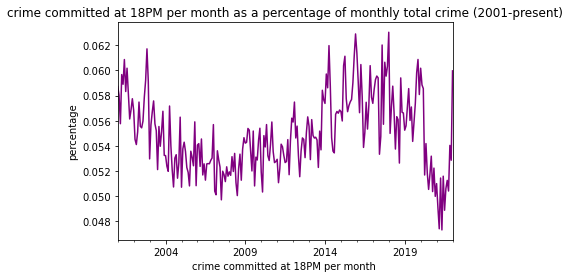

In [182]:
gbTH = df.groupby('time_in_hour')
eighteen_pm = gbTH.get_group('18').resample('M').size().to_frame()
eighteen_pm.columns=['crime committed at 18PM']
eighteen_pm['crime per month']=crime_per_month
eighteen_pm['18PM crime pct of total'] = eighteen_pm['crime committed at 18PM']/eighteen_pm['crime per month']
eighteen_pm['18PM crime pct of total'].plot(color = 'purple')
plt.title('crime committed at 18PM per month as a percentage of monthly total crime (2001-present)')
plt.xlabel("crime committed at 18PM per month ")
plt.ylabel("percentage")